# Predicting the Presence of Diabetes using Machine Learning Regression
In this notebook, I will use Machine Learning to predict if a patient has diabetes.

## 1. Problem definition
>How well can diabetes be predicted using certain medical characteristics and model tuning?

## 2. Data

The data is downloaded from the Kaggle Diabetes Health Indicators Dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv

## 3. Evaluation

Because this is a regression project, the primary goal of the evaluation metrics will be to minimize error.

## 4. Features

**0** will *typically* mean that the patient lacks a feature or simply means "No" to a question.                 
**1** will *typically* mean that the patient possesses a feature or simply means "Yes" to a question.

* **Diabetes_binary** - The patient either does not have diabetes (0) or has prediabetes or diabetes (1)
* **HighBP:** High Blood Pressure - Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
* **HighChol:** High Cholesterol - Has the patient EVER been told by a doctor, nurse or other health professional that their blood cholesterol is high?
* **CholCheck:** Has the patient had a cholesterol check within the past five years?
* **BMI:** Body Mass Index
* **Smoker:** Has the patient smoked at least 100 cigarettes in their entire life?
* **Stroke:** Has the patient had a stroke
* **HeartDiseaseorAttack:** Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction
* **PhysActivity:** Physical Activity - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* **Fruits:** Consume Fruit 1 or more times per day
* **Veggies:** Consume Vegetables 1 or more times per day
* **HvyAlcoholConsump:** Heavy Alcohol Consumption - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
* **AnyHealthcare:** Does the patient have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?
* **NoDocbcCost:** Was there a time in the past 12 months when the patient needed to see a doctor but could not because of cost?
* **GenHlth:** General Health - Would the patient say that in general their health is: 1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor
* **MentHlth:** Mental Health - For how many days during the past 30 days was the patient's mental health not good, including stress, depression, and problems with emotions?
* **PhysHlth:** Physical Health - For how many days during the past 30 days was their physical health not good, which includes physical illness and injury?
* **DiffWalk:** Walking Difficulty - Does the patient have serious difficulty walking or climbing stairs?
* **Sex:** Indicate sex of respondent (0 = Female, 1 = Male).
* **Age:** Thirteen-level age category: 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9=60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80 or higher
* **Education:** What is the highest grade or year of school the patient completed? 1 = never attended or only kindergarten, 2 = elementary, etc.
* **Income:** Income scale: 1 = $10,000 or less, 5 = less than 35,000, 8 = 75,000 or more

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from pylab import hist, show, xticks
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import GradientBoostingRegressor

In [272]:
pd.options.display.max_columns = 100

In [273]:
pd.options.display.max_rows = 100

In [274]:
# Import the dataset
df = pd.read_csv("data/diabetes-database.csv")

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [276]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [277]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [278]:
sns.set()

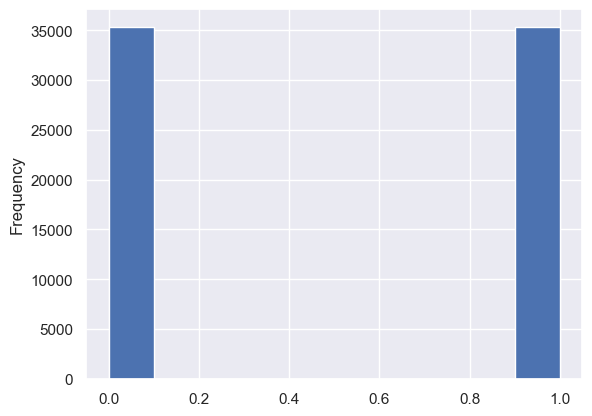

In [279]:
# Seeing disparity between quantity of patience with and without diabetes
df["Diabetes_binary"].plot.hist();

In [280]:
df["Diabetes_binary"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

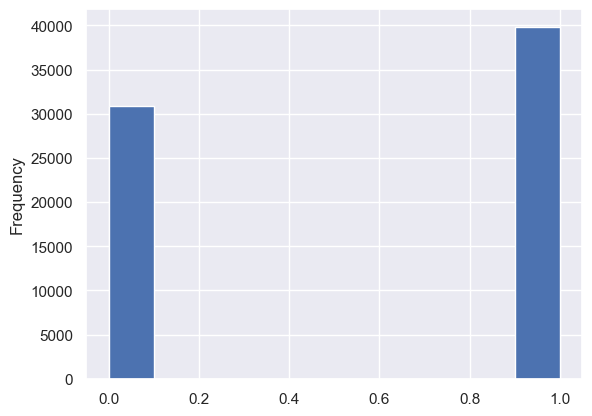

In [281]:
df.HighBP.plot.hist();

In [282]:
df["HighBP"].value_counts(ascending=True)

0.0    30860
1.0    39832
Name: HighBP, dtype: int64

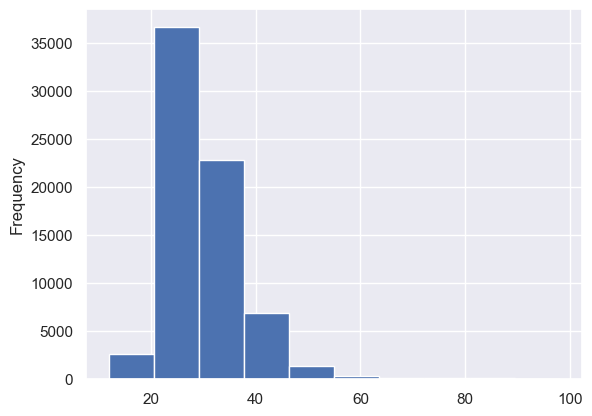

In [283]:
df.BMI.plot.hist();

In [284]:
df["BMI"].value_counts().sort_index()

12.0       1
13.0       8
14.0       8
15.0      30
16.0      70
17.0     170
18.0     366
19.0     691
20.0    1256
21.0    2028
22.0    2778
23.0    3315
24.0    4392
25.0    4031
26.0    4975
27.0    6327
28.0    4583
29.0    4219
30.0    4344
31.0    3753
32.0    3481
33.0    3159
34.0    2564
35.0    2107
36.0    1794
37.0    1607
38.0    1415
39.0    1189
40.0     970
41.0     701
42.0     686
43.0     665
44.0     456
45.0     373
46.0     359
47.0     272
48.0     236
49.0     195
50.0     195
51.0     122
52.0     111
53.0     109
54.0      57
55.0      79
56.0      50
57.0      37
58.0      44
59.0      25
60.0      29
61.0      20
62.0      18
63.0      20
64.0       9
65.0      11
66.0       9
67.0       8
68.0       7
69.0       4
70.0       5
71.0       9
72.0       9
73.0      12
74.0       1
75.0       9
76.0       2
77.0      18
78.0       1
79.0      17
80.0       1
81.0       9
82.0      11
83.0       1
84.0      13
85.0       1
86.0       1
87.0      13
89.0       4

In [285]:
df["Education"].value_counts().sort_index()

1.0       75
2.0     1647
3.0     3447
4.0    19473
5.0    20030
6.0    26020
Name: Education, dtype: int64

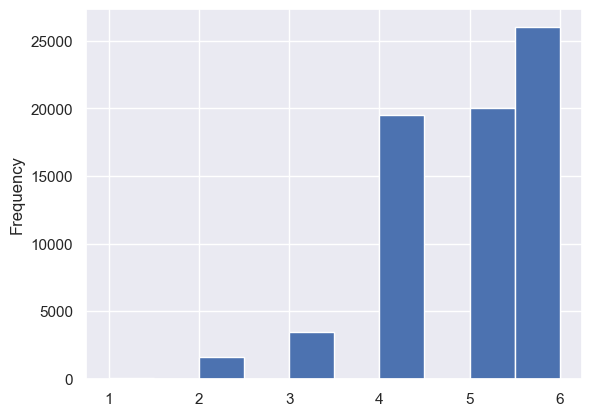

In [286]:
df.Education.plot.hist();

In [287]:
df["Sex"].value_counts().sort_index()

0.0    38386
1.0    32306
Name: Sex, dtype: int64

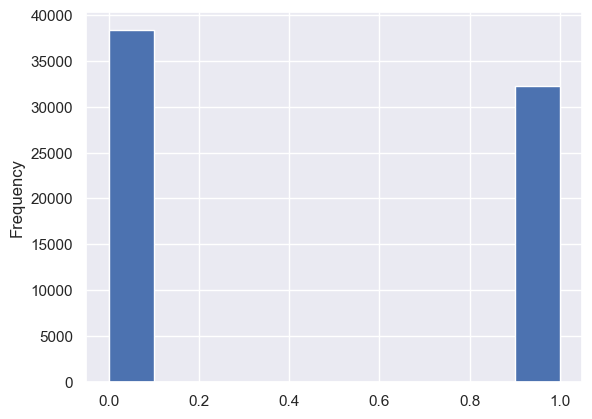

In [288]:
df.Sex.plot.hist();

In [289]:
df["DiffWalk"].value_counts().sort_index()

0.0    52826
1.0    17866
Name: DiffWalk, dtype: int64

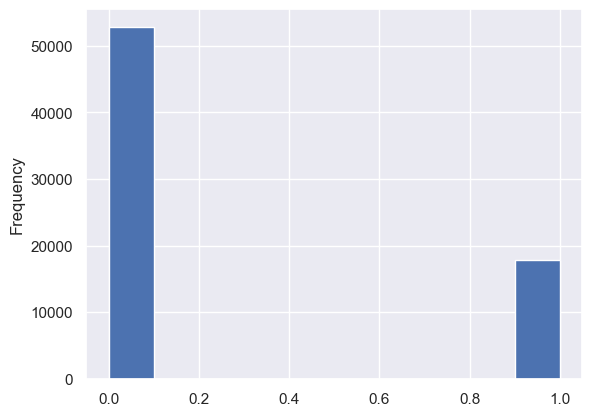

In [290]:
df.DiffWalk.plot.hist();

In [291]:
df["GenHlth"].value_counts().sort_index()

1.0     8282
2.0    19872
3.0    23427
4.0    13303
5.0     5808
Name: GenHlth, dtype: int64

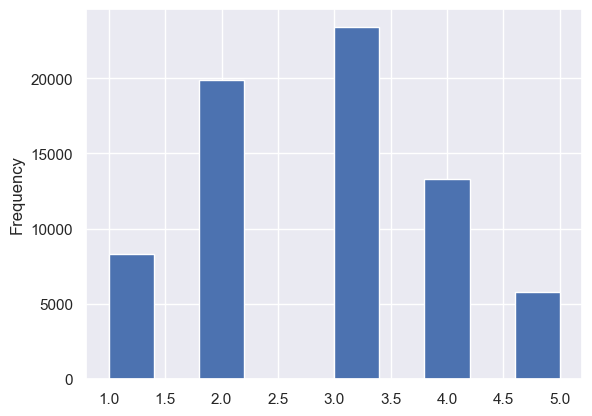

In [292]:
df.GenHlth.plot.hist();

In [293]:
df["HeartDiseaseorAttack"].value_counts().sort_index()

0.0    60243
1.0    10449
Name: HeartDiseaseorAttack, dtype: int64

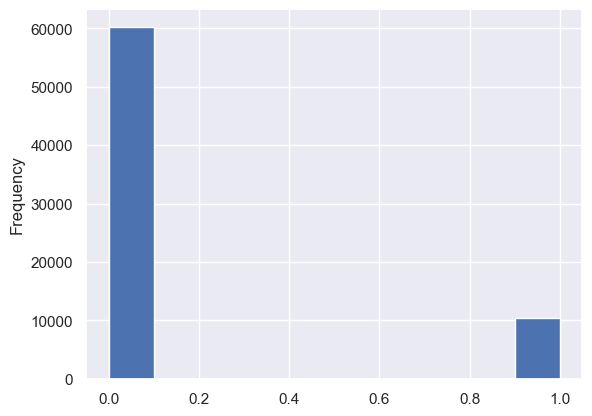

In [294]:
df.HeartDiseaseorAttack.plot.hist();

In [295]:
df["Stroke"].value_counts().sort_index()

0.0    66297
1.0     4395
Name: Stroke, dtype: int64

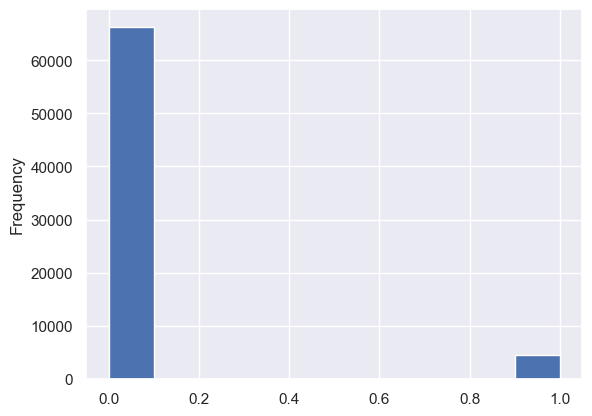

In [296]:
df.Stroke.plot.hist();

In [297]:
df["Smoker"].value_counts().sort_index()

0.0    37094
1.0    33598
Name: Smoker, dtype: int64

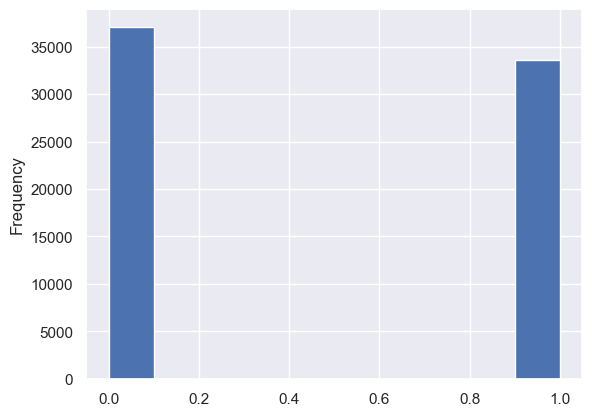

In [298]:
df.Smoker.plot.hist();

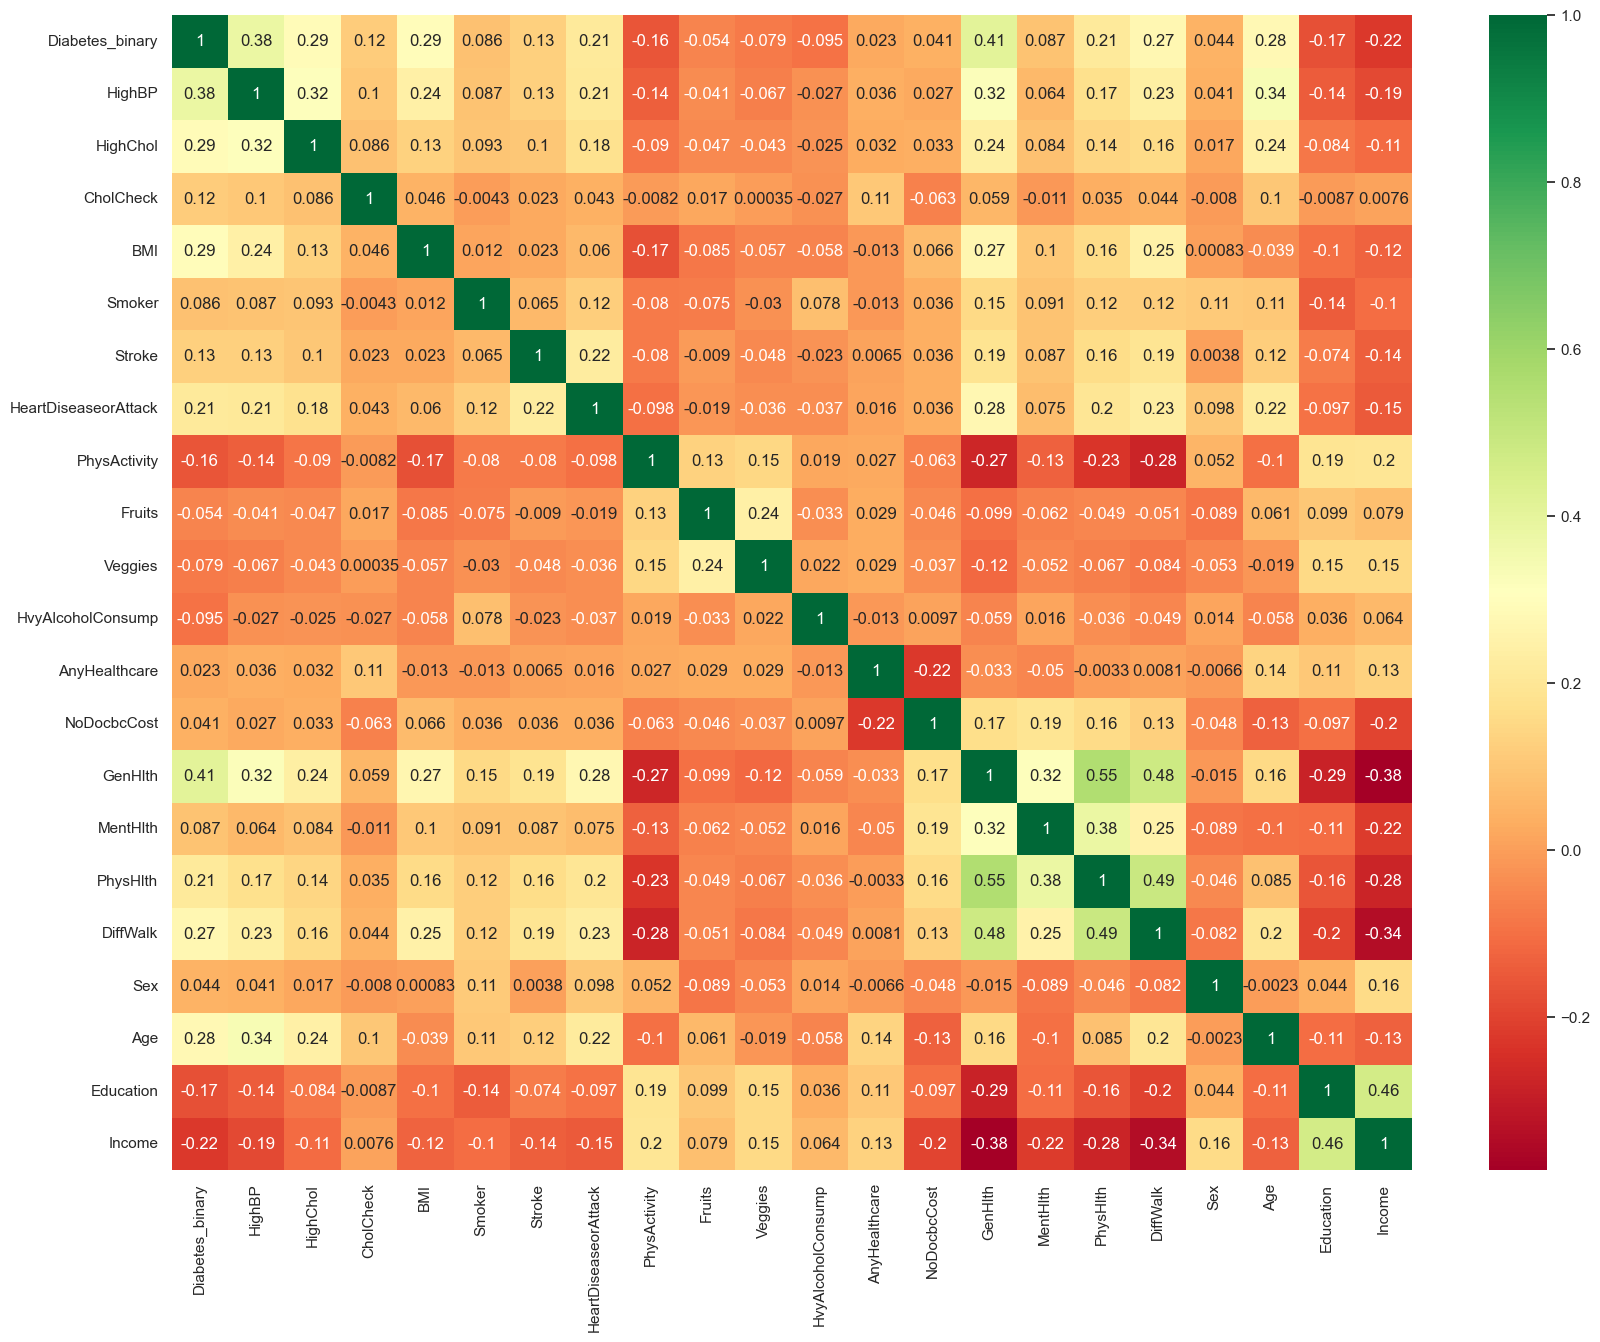

In [299]:
# Correlation
plt.figure(figsize=(20,15))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

## 5.1 Modeling Balanced Dataset

This marks the end of exploratory data analysis. Here begins the modeling section.

### Splitting into train and test sets

In [300]:
# Split data into X and y
X = df.drop("Diabetes_binary", axis=1)
y=df["Diabetes_binary"]

In [301]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [302]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
70687    1.0
70688    1.0
70689    1.0
70690    1.0
70691    1.0
Name: Diabetes_binary, Length: 70692, dtype: float64

In [303]:
# Set consistent results
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
  """
  Calculates root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create fucntion to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(X_train)
  scores = {"MAE": mean_absolute_error(y_train, train_preds),
            "RMSLE": rmsle(y_train, train_preds),
            "R^2": r2_score(y_train, train_preds)}
  return scores

In [305]:
model = RandomForestRegressor(n_jobs=-1, random_state=31)

In [306]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=31)

In [307]:
show_scores(model)

{'MAE': 0.12998466330293476,
 'RMSLE': 0.12264512905363714,
 'R^2': 0.8906319521526749}

In [308]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestRegressor(),
          "Gradient Boost": GradientBoostingRegressor(),
          "Classisier": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its sxore to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [309]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\asher\OneDrive\Desktop\Career\Diabetes Prediction 05-23\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7410000707263598,
 'Random Forest': 0.2624229667993715,
 'Gradient Boost': 0.3314316198352837,
 'Classisier': 0.7366150364240752}

In [310]:
# Hyperparameter tune LogisticRegression

# Create a hyperparameter grid for LogisitcRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [311]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [312]:
rs_log_reg.score(X_test, y_test)

0.7484970648560718

In [313]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [314]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 62.10169418915616, 'solver': 'liblinear'}

In [315]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.7484263384963576

In [316]:
# Try different options for better performance
#!pip install catboost

In [317]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=460)

clf1 = GradientBoostingClassifier(n_estimators = 300)
clf1.fit(X_train, y_train)

gradboostPreds = clf1.predict(X_test)

report1 = classification_report(y_test, gradboostPreds, output_dict=True)
report1 = pd.DataFrame(report1)


clf2 = CatBoostClassifier(n_estimators = 300)
clf2.fit(X_train, y_train)

catboostPreds = clf2.predict(X_test)

report2 = classification_report(y_test, catboostPreds, output_dict=True)
report2 = pd.DataFrame(report2)


clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

logregPreds = clf3.predict(X_test)

report3 = classification_report(y_test, logregPreds, output_dict=True)
report3 = pd.DataFrame(report3)


clf4 = RandomForestClassifier(n_estimators = 300)
clf4.fit(X_train, y_train)

rfcPreds = clf4.predict(X_test)

report4 = classification_report(y_test, rfcPreds, output_dict=True)
report4 = pd.DataFrame(report4)

Learning rate set to 0.164418
0:	learn: 0.6372303	total: 9.43ms	remaining: 2.82s
1:	learn: 0.5993469	total: 16.7ms	remaining: 2.48s
2:	learn: 0.5741598	total: 23.5ms	remaining: 2.33s
3:	learn: 0.5563419	total: 29.5ms	remaining: 2.18s
4:	learn: 0.5430767	total: 36.1ms	remaining: 2.13s
5:	learn: 0.5341420	total: 43ms	remaining: 2.1s
6:	learn: 0.5268904	total: 49.8ms	remaining: 2.08s
7:	learn: 0.5218420	total: 55.8ms	remaining: 2.04s
8:	learn: 0.5176853	total: 62.4ms	remaining: 2.02s
9:	learn: 0.5145518	total: 68.8ms	remaining: 1.99s
10:	learn: 0.5115617	total: 75.8ms	remaining: 1.99s
11:	learn: 0.5091022	total: 82.6ms	remaining: 1.98s
12:	learn: 0.5070011	total: 89.2ms	remaining: 1.97s
13:	learn: 0.5054920	total: 95.8ms	remaining: 1.96s
14:	learn: 0.5043338	total: 103ms	remaining: 1.95s
15:	learn: 0.5033686	total: 109ms	remaining: 1.94s
16:	learn: 0.5023282	total: 116ms	remaining: 1.93s
17:	learn: 0.5013790	total: 123ms	remaining: 1.92s
18:	learn: 0.5007444	total: 129ms	remaining: 1.91s


175:	learn: 0.4706266	total: 1.22s	remaining: 858ms
176:	learn: 0.4704010	total: 1.23s	remaining: 852ms
177:	learn: 0.4702992	total: 1.23s	remaining: 845ms
178:	learn: 0.4701068	total: 1.24s	remaining: 838ms
179:	learn: 0.4700610	total: 1.25s	remaining: 831ms
180:	learn: 0.4699504	total: 1.25s	remaining: 824ms
181:	learn: 0.4698111	total: 1.26s	remaining: 817ms
182:	learn: 0.4696204	total: 1.27s	remaining: 810ms
183:	learn: 0.4694847	total: 1.27s	remaining: 803ms
184:	learn: 0.4693898	total: 1.28s	remaining: 796ms
185:	learn: 0.4691504	total: 1.29s	remaining: 789ms
186:	learn: 0.4689888	total: 1.29s	remaining: 782ms
187:	learn: 0.4688843	total: 1.3s	remaining: 775ms
188:	learn: 0.4687617	total: 1.31s	remaining: 768ms
189:	learn: 0.4685953	total: 1.31s	remaining: 762ms
190:	learn: 0.4684455	total: 1.32s	remaining: 755ms
191:	learn: 0.4683762	total: 1.33s	remaining: 748ms
192:	learn: 0.4682631	total: 1.34s	remaining: 741ms
193:	learn: 0.4681288	total: 1.34s	remaining: 734ms
194:	learn: 0

C:\Users\asher\OneDrive\Desktop\Career\Diabetes Prediction 05-23\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [318]:
report1

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.775456,0.733000,0.752641,0.754228,0.754322
recall,0.714299,0.791323,0.752641,0.752811,0.752641
f1-score,0.743622,0.761046,0.752641,0.752334,0.752295
support,10651.000000,10557.000000,0.752641,21208.000000,21208.000000


In [319]:
report2

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.773795,0.730729,0.750613,0.752262,0.752357
recall,0.711389,0.790187,0.750613,0.750788,0.750613
f1-score,0.741281,0.759295,0.750613,0.750288,0.750248
support,10651.000000,10557.000000,0.750613,21208.000000,21208.000000


In [320]:
report3

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.752707,0.732135,0.742078,0.742421,0.742466
recall,0.724439,0.759875,0.742078,0.742157,0.742078
f1-score,0.738303,0.745747,0.742078,0.742025,0.742008
support,10651.000000,10557.000000,0.742078,21208.000000,21208.000000


In [321]:
report4

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.757662,0.718100,0.73642,0.737881,0.737969
recall,0.698620,0.774557,0.73642,0.736589,0.736420
f1-score,0.726944,0.745261,0.73642,0.736102,0.736062
support,10651.000000,10557.000000,0.73642,21208.000000,21208.000000


Only a small improvement above 75% has been made here. I will now try with the larger iteration of this dataset, with the sacrifice of the perfect class balance this dataset has.

## 5.2 Modeling Large Dataset

In [322]:
dfl = pd.read_csv("data/diabetes-large-database.csv")

In [323]:
dfl.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [324]:
df.shape

(70692, 22)

In [325]:
dfl.shape

(253680, 22)

In [326]:
X2 = dfl.drop("Diabetes_binary", axis=1)
y2 = dfl["Diabetes_binary"]

In [327]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=460)

clf5 = GradientBoostingClassifier(n_estimators = 300)
clf5.fit(X2_train, y2_train)

gradboostPreds2 = clf5.predict(X2_test)

report5 = classification_report(y2_test, gradboostPreds2, output_dict=True)
report5 = pd.DataFrame(report5)


clf6 = CatBoostClassifier(n_estimators = 300)
clf6.fit(X2_train, y2_train)

catboostPreds2 = clf6.predict(X2_test)

report6 = classification_report(y2_test, catboostPreds2, output_dict=True)
report6 = pd.DataFrame(report6)


clf7 = LogisticRegression(max_iter=300)
clf7.fit(X2_train, y2_train)

logregPreds2 = clf7.predict(X2_test)

report7 = classification_report(y2_test, logregPreds2, output_dict=True)
report7 = pd.DataFrame(report7)


clf8 = RandomForestClassifier(n_estimators = 300)
clf8.fit(X2_train, y2_train)

rfcPreds2 = clf8.predict(X2_test)

report8 = classification_report(y2_test, rfcPreds2, output_dict=True)
report8 = pd.DataFrame(report8)

Learning rate set to 0.283727
0:	learn: 0.4719159	total: 15.4ms	remaining: 4.6s
1:	learn: 0.3847347	total: 27.6ms	remaining: 4.11s
2:	learn: 0.3558227	total: 39.4ms	remaining: 3.9s
3:	learn: 0.3376862	total: 51.4ms	remaining: 3.81s
4:	learn: 0.3269057	total: 62.9ms	remaining: 3.71s
5:	learn: 0.3214137	total: 74.3ms	remaining: 3.64s
6:	learn: 0.3192139	total: 86.2ms	remaining: 3.61s
7:	learn: 0.3168863	total: 98.2ms	remaining: 3.58s
8:	learn: 0.3156194	total: 110ms	remaining: 3.54s
9:	learn: 0.3143231	total: 122ms	remaining: 3.53s
10:	learn: 0.3138061	total: 132ms	remaining: 3.47s
11:	learn: 0.3134202	total: 144ms	remaining: 3.45s
12:	learn: 0.3127722	total: 155ms	remaining: 3.42s
13:	learn: 0.3124055	total: 166ms	remaining: 3.4s
14:	learn: 0.3120716	total: 177ms	remaining: 3.37s
15:	learn: 0.3117263	total: 189ms	remaining: 3.35s
16:	learn: 0.3113725	total: 200ms	remaining: 3.34s
17:	learn: 0.3111584	total: 213ms	remaining: 3.34s
18:	learn: 0.3109243	total: 225ms	remaining: 3.33s
19:	le

160:	learn: 0.2974703	total: 1.89s	remaining: 1.63s
161:	learn: 0.2974239	total: 1.9s	remaining: 1.62s
162:	learn: 0.2973783	total: 1.91s	remaining: 1.61s
163:	learn: 0.2973439	total: 1.92s	remaining: 1.59s
164:	learn: 0.2972728	total: 1.94s	remaining: 1.58s
165:	learn: 0.2972183	total: 1.95s	remaining: 1.57s
166:	learn: 0.2971347	total: 1.96s	remaining: 1.56s
167:	learn: 0.2970684	total: 1.97s	remaining: 1.54s
168:	learn: 0.2970012	total: 1.98s	remaining: 1.53s
169:	learn: 0.2969071	total: 1.99s	remaining: 1.52s
170:	learn: 0.2968687	total: 2s	remaining: 1.51s
171:	learn: 0.2968442	total: 2.01s	remaining: 1.5s
172:	learn: 0.2967698	total: 2.02s	remaining: 1.49s
173:	learn: 0.2966893	total: 2.04s	remaining: 1.47s
174:	learn: 0.2966244	total: 2.05s	remaining: 1.46s
175:	learn: 0.2965805	total: 2.06s	remaining: 1.45s
176:	learn: 0.2965541	total: 2.07s	remaining: 1.44s
177:	learn: 0.2964784	total: 2.08s	remaining: 1.43s
178:	learn: 0.2964136	total: 2.09s	remaining: 1.42s
179:	learn: 0.296

C:\Users\asher\OneDrive\Desktop\Career\Diabetes Prediction 05-23\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [328]:
report5

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.879141,0.559513,0.865697,0.719327,0.834614
recall,0.978474,0.168930,0.865697,0.573702,0.865697
f1-score,0.926152,0.259509,0.865697,0.592830,0.833282
support,65502.000000,10602.000000,0.865697,76104.000000,76104.000000


In [329]:
report6

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.879062,0.545897,0.864659,0.712479,0.832649
recall,0.977192,0.169402,0.864659,0.573297,0.864659
f1-score,0.925533,0.258566,0.864659,0.592049,0.832618
support,65502.000000,10602.000000,0.864659,76104.000000,76104.000000


In [330]:
report7

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.877217,0.532053,0.863279,0.704635,0.829132
recall,0.978046,0.154216,0.863279,0.566131,0.863279
f1-score,0.924892,0.239122,0.863279,0.582007,0.829357
support,65502.000000,10602.000000,0.863279,76104.000000,76104.000000


In [331]:
report8

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.878438,0.488587,0.859587,0.683513,0.824128
recall,0.971268,0.169591,0.859587,0.570429,0.859587
f1-score,0.922524,0.251785,0.859587,0.587155,0.829084
support,65502.000000,10602.000000,0.859587,76104.000000,76104.000000


Using the full dataset shows the ratio is a very vital variable. This may be more realistic being that it is the full set, so I am content with using the top scores that all are above my goal of 85% or higher.

Now it's time to try hyperparameter tuning with these results.

In [332]:
'''
from sklearn.model_selection import GridSearchCV
# Hyperparameter tune GradBoostClasssifier

parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9]
}

cv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)
cv.fit(X2_train, y2_train.values.ravel())
'''

'\nfrom sklearn.model_selection import GridSearchCV\n# Hyperparameter tune GradBoostClasssifier\n\nparameters = {\n    "n_estimators":[5,50,250,500],\n    "max_depth":[1,3,5,7,9]\n}\n\ncv = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)\ncv.fit(X2_train, y2_train.values.ravel())\n'

In [333]:
'''
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
'''

'\ndef display(results):\n    print(f\'Best parameters are: {results.best_params_}\')\n    print("\n")\n    mean_score = results.cv_results_[\'mean_test_score\']\n    std_score = results.cv_results_[\'std_test_score\']\n    params = results.cv_results_[\'params\']\n    for mean,std,params in zip(mean_score,std_score,params):\n        print(f\'{round(mean,3)} + or -{round(std,3)} for the {params}\')\n'

In [334]:
#display(cv)

In [335]:
#cv.best_params_
# The best params are max_depth:3, n_estimators:250

In [336]:
#cv.best_params_.setdefault

In [337]:
cv = GradientBoostingClassifier(max_depth=3, n_estimators=250)
cv.fit(X2_train, y2_train)

GradientBoostingClassifier(n_estimators=250)

**Final Score:**

In [338]:
final_score = cv.score(X2_test, y2_test)

In [339]:
print(f"This model made to predict if a patient has diabetes has an accuracy score of: {final_score*100:.2f}%")

This model made to predict if a patient has diabetes has an accuracy score of: 86.61%


## 6. Evaluating Feature Importance

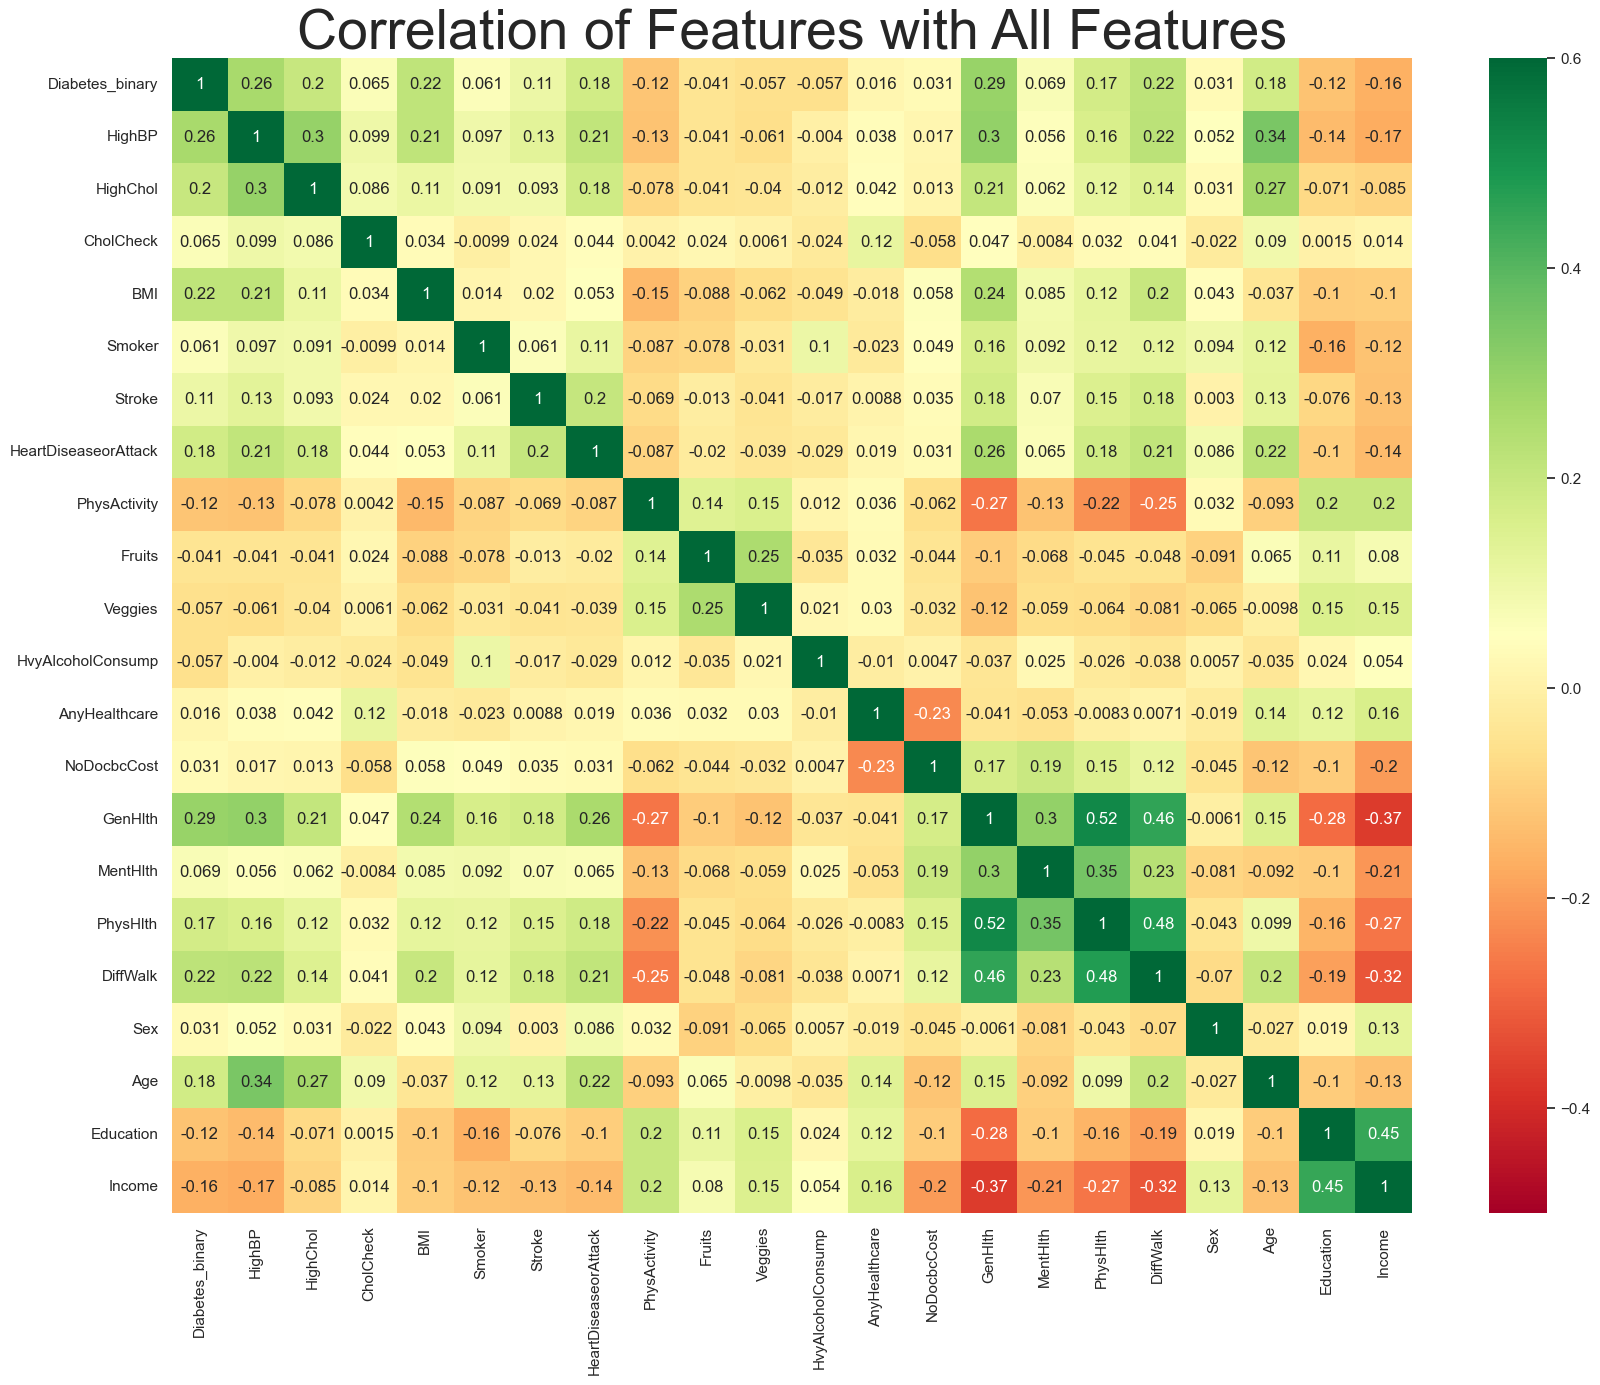

In [340]:
# Correlation
plt.figure(figsize=(20,15))
p=sns.heatmap(dfl.corr(),annot=True,cmap='RdYlGn', vmin=-.5, vmax=0.6)
plt.title("Correlation of Features with All Features", fontsize=40)


plt.show()

In [341]:
# Fit an instance of LogisticRegression
clf = GradientBoostingClassifier(max_depth=3, n_estimators=250)

clf.fit(X2_train, y2_train)

GradientBoostingClassifier(n_estimators=250)

In [342]:
clf.score(X2_test, y2_test)

0.866104278355934

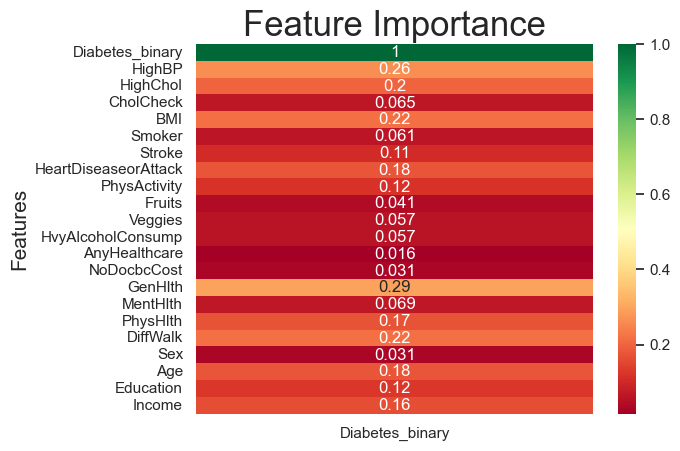

In [343]:
corr = dfl.corr().abs()

x = corr[['Diabetes_binary']]
sns.heatmap(x, annot=True, cmap='RdYlGn')
plt.title("Feature Importance", fontsize=25)
plt.ylabel('Features', fontsize=15);

In [344]:
def correlation_table(data,target_column):
  data_num = data.select_dtypes(include=['int','float'])
  corr_df = pd.DataFrame(data_num.corrwith(data_num[target_column]),columns=['Correlation']).dropna()
  corr_df['ABS Correlation'] = abs(corr_df['Correlation'])
  corr_df.sort_values(by=['ABS Correlation'], ascending=False, inplace=True)
  print(corr_df)

dflc = correlation_table(dfl, 'Diabetes_binary')

                      Correlation  ABS Correlation
Diabetes_binary          1.000000         1.000000
GenHlth                  0.293569         0.293569
HighBP                   0.263129         0.263129
DiffWalk                 0.218344         0.218344
BMI                      0.216843         0.216843
HighChol                 0.200276         0.200276
Age                      0.177442         0.177442
HeartDiseaseorAttack     0.177282         0.177282
PhysHlth                 0.171337         0.171337
Income                  -0.163919         0.163919
Education               -0.124456         0.124456
PhysActivity            -0.118133         0.118133
Stroke                   0.105816         0.105816
MentHlth                 0.069315         0.069315
CholCheck                0.064761         0.064761
Smoker                   0.060789         0.060789
HvyAlcoholConsump       -0.057056         0.057056
Veggies                 -0.056584         0.056584
Fruits                  -0.0407

In [346]:
dfl

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [350]:
dfl_test = dfl.drop("Diabetes_binary", axis=1)
dfl_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [351]:
test_preds = clf.predict(dfl_test)

In [352]:
dfl_preds = pd.DataFrame()
dfl_preds["Diabetes_binary"] = test_preds
dfl_preds

,Diabetes_binary
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
253675,0.0
253676,0.0
253677,0.0
253678,0.0


In [353]:
# Export prediction data
dfl_preds.to_csv("data/test_predictions.csv")